In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
#from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#import matplotlib

In [2]:
#ucitavanje skupa
df = pd.read_csv("C:/Users/student/Desktop/ipVezbe122021/primeri/dogs.csv")

#prikaz imena kolona + 5 prvih instanci
print('Prvih 5 instanci')
print(df.head())


Prvih 5 instanci
              breed  height  weight
0     Border Collie      19      45
1    Boston Terrier      12      20
2  Brittany Spaniel      18      35
3       Bullmastiff      29     120
4         Chihuahua       8       8


In [3]:
# Za klasterovanje ce se koristiti atributi visina i tezina psa,
# a rasa nece biti uzeta u obzir.
features = df.columns[1:]

#vrednost atributa breed (tj. rasa) postaje oznaka (indeks) instance
df.set_index('breed', inplace=True)


In [4]:
df

height  weight
breed                               
Border Collie             19      45
Boston Terrier            12      20
Brittany Spaniel          18      35
Bullmastiff               29     120
Chihuahua                  8       8
German Shepherd           22      78
Golden Retriever          23      70
Great Dane                32     160
Portuguese Water Dog      21      50
Standard Poodle           19      65
Yorkshire Terrier          6       7

In [9]:
#normalizacija vrednosti atributa
scaler = MinMaxScaler().fit(df)
x = pd.DataFrame(scaler.transform(df), columns=features, index=df.index)


In [10]:
x

height    weight
breed                                   
Border Collie         0.500000  0.248366
Boston Terrier        0.230769  0.084967
Brittany Spaniel      0.461538  0.183007
Bullmastiff           0.884615  0.738562
Chihuahua             0.076923  0.006536
German Shepherd       0.615385  0.464052
Golden Retriever      0.653846  0.411765
Great Dane            1.000000  1.000000
Portuguese Water Dog  0.576923  0.281046
Standard Poodle       0.500000  0.379085
Yorkshire Terrier     0.000000  0.000000

In [12]:
#postavljanje parametara za sliku
#matplotlib.rcParams['font.size']=8


In [13]:
#Primena hijerarhijskg sakupljajuceg klasterovanja koriscenjem euklidskog rastojanja
# i 'average' veze pri odredjivanju bliskosti dva klastera.
#Rezultat je matrica spajanja pri klasterovanju.
Z = linkage(x, 'average')
print(Z)


[[ 5.          6.          0.06490979  2.        ]
 [ 0.          2.          0.07583634  2.        ]
 [ 4.         10.          0.07720025  2.        ]
 [ 8.         12.          0.11749404  3.        ]
 [ 9.         11.          0.15028617  3.        ]
 [14.         15.          0.20912385  6.        ]
 [ 1.         13.          0.20929971  3.        ]
 [ 3.          7.          0.28576807  2.        ]
 [16.         17.          0.54224963  9.        ]
 [18.         19.          0.84284893 11.        ]]


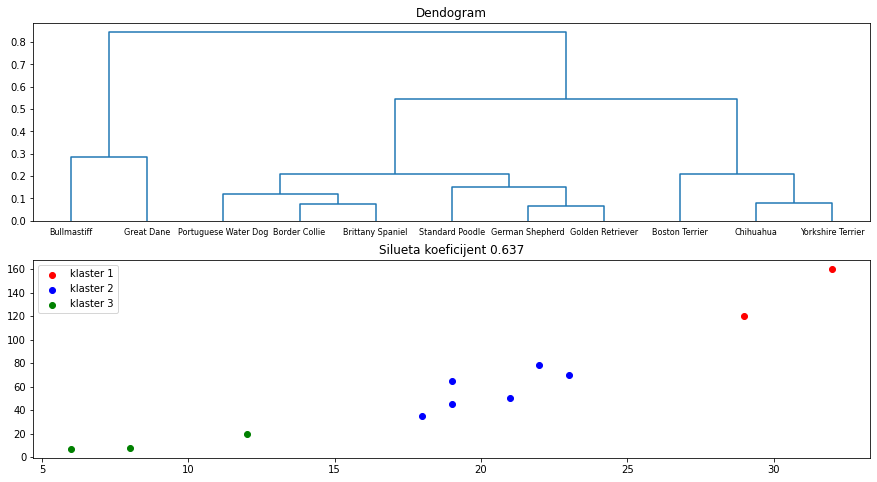

In [31]:
# pravljenje slike sa graficima
fig = plt.figure(figsize=(15, 8))

# Podela slike na 2x1 celije. U prvoj celiji se crta dendogram.
fig.add_subplot(2,1,1)

#prikaz izvrsenog hijerarhijskog klasterovanja pomocu dendograma
dn = dendrogram(Z, labels=x.index, leaf_font_size=8, color_threshold=0 )
plt.title('Dendogram')
# Definisanje boja koje se koriste pri crtanju instanci klastera.
# Instance jednog klastera ce biti prikazane istom bojom.
colors = ['red', 'blue', 'green']

# U drugoj celiji na slici prikazuju se instance klastera pomocu seme sa
# rasprsenim elementima.
fig.add_subplot(2,1,2)

#Odredjivanje kom klasteru pripada svaka instanca u skupu.
#Kao prag za rastojanje pri spajanju klastera postavlja se vrednost 0.3,
# tj. prekida se spajanje klastera cije je rastojanje iznad 0.3.
#Ako je criterion='maxclust' onda se preko t zadaje zeljeni broj klastera.

df['label'] = fcluster(Z, t=0.3, criterion='distance')

#Napomena: Nakon promene parametra color_threshold=0.3 u funkciji dendrogram
# plavom bojom se prikazuju spajanja klastera koja se ne izvrsavaju. Razlicitim
# bojama se prikazuju instance klastera koji ce biti izdvojeni. Oznake klastera su
#u intervalu [1,k], gde je k ukupan broj klastera.

for i in range(1, max(df['label'])+1):
    # izdvajanje instanci klastera koji se obradjuje
    cluster = df.loc[df['label']==i]

    # crtanje instanci klastera pomocu seme sa rasprsenim elementima
    plt.scatter(cluster['height'], cluster['weight'], color=colors[i-1], label='klaster %d' %i)

# postavljanje legende i naslova za drugu celiju
plt.title('Silueta koeficijent {0:0.3}'.format(silhouette_score(x, df['label'])))
t=plt.legend()




In [32]:
#Komentar: izdvojena su tri klastera kojima su grupisani psi malog, srednjeg i velikog rasta.

#Na dendogramu se jasno vidi da postoje 3 dobro odvojena klastera, tj. da ne treba izvrsiti
# poslednja 2 spajanja klastera, sto se i postize sa zadatim pragom za rastojanje od 0.3.
